In [1]:
#Connect Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#importPackages

import os
import cv2
import glob
import numpy as np 
import matplotlib.pyplot as plt

In [13]:
trainDir="/content/drive/MyDrive/train/"
testDir="/content/drive/MyDrive/test/"
project="signVerify"

In [4]:
#Data Visualization

In [5]:
#genuine_Signature

(359, 725, 3)


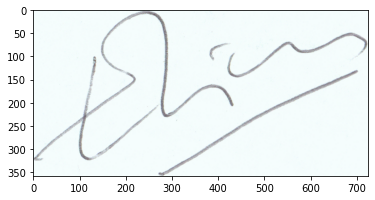

In [7]:

import matplotlib.pyplot as plt
imgGenuine = plt.imread(trainDir+'/001/001_01.PNG')
plt.imshow(imgGenuine)
print(imgGenuine.shape)

In [8]:
#Forged_Signature

(312, 629, 3)


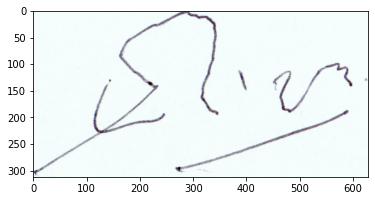

In [9]:
imgForg = plt.imread('/content/drive/MyDrive/train/001_forg/0119001_01.png')
plt.imshow(imgForg)
print(imgForg.shape)

In [20]:
#Model Training Function

def modelTraining(trainDir,testDir,project):

    #width,height size
    size = 224

    #Stored Training Data into List

    trainData = []
    trainLabels = []

    for per in os.listdir(trainDir+'/'):
        for data in glob.glob(trainDir+'/'+per+'/*.*'):
            img = cv2.imread(data)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, (size,size))
            trainData.append([img])
            if per[-1]=='g':
                trainLabels.append(np.array(1))
            else:
                trainLabels.append(np.array(0))

    trainData = np.array(trainData)/255.0
    trainLabels = np.array(trainLabels)

    #Stored Testing Data into List

    testData = []
    testLabels = []

    for per in os.listdir(testDir+'/'):  
        for data in glob.glob(testDir+'/'+per+'/*.*'):
            img = cv2.imread(data)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, (size,size))
            testData.append([img])
            if per[-1]=='g':
                testLabels.append(np.array(1))
            else:
                testLabels.append(np.array(0))

    testData = np.array(testData)/255.0
    testLabels = np.array(testLabels)
 
    #Convert to Categorical features

    from tensorflow.keras.utils import to_categorical
    trainLabels = to_categorical(trainLabels)

    #Reshaping_data

    trainData = trainData.reshape(-1, size,size, 3)
    testData = testData.reshape(-1, size,size, 3)

    #Shuffle the data

    from sklearn.utils import shuffle
    trainData,trainLabels = shuffle(trainData,trainLabels)
    testData,testLabels = shuffle(testData,testLabels)

    #Transfer learning VGG16 Algorithm implementation

    import tensorflow 
    from tensorflow import keras
    from keras import optimizers
    from tensorflow.keras.optimizers import Adam
    from tensorflow.keras.applications.vgg16 import VGG16
    from tensorflow.keras.layers import Dropout, Flatten, Dense
    from tensorflow.keras.models import Sequential, Model, load_model
    
    base_model =VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3))
    base_model.summary()

    add_model = Sequential()
    add_model.add(Flatten(input_shape=base_model.output_shape[1:]))
    add_model.add(Dense(256, activation='relu'))
    add_model.add(Dense(2, activation='softmax'))

    model = Model(inputs=base_model.input, outputs=add_model(base_model.output))

    model.compile(loss='binary_crossentropy', optimizer=Adam(lr=1e-4),
                metrics=['accuracy'])
    model.summary()

    #Traning Process

    from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau, TensorBoard

    earlyStopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=3,verbose=1)

    earlyStop=[earlyStopping]

    epoch = 20

    batchSize = 64
    
    history = model.fit(trainData,trainLabels, batch_size=batchSize,epochs=epoch, callbacks=earlyStop,validation_split=.3)

    #Save the Model
    modelFile = project+"_model.h5"
    model.save(modelFile)

    return history

In [21]:
modelName = modelTraining(trainDir,testDir,project)

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/20
19/19 [==============================] - 34s 2s/step - loss: 0.5327 - accuracy: 0.7344 - val_loss: 0.2682 - val_accuracy: 0.9104
Epoch 2/20
19/19 [==============================] - 32s 2s/step - loss: 0.1780 - accuracy: 0.9283 - val_loss: 0.4570 - val_accuracy: 0.7550
Epoch 3/20
19/19 [==============================] - 32s 2s/step - loss: 0.1722 - accuracy: 0.9291 - val_loss: 0.1776 - val_accuracy: 0.9422
Epoch 4/20
19/19 [==============================] - 32s 2s/step - loss: 0.1222 - accuracy: 0.9488 - val_loss: 0.1097 - val_accuracy: 0.9622
Epoch 5/20
19/19 [==============================] - 32s 2s/step - loss: 0.0514 - accuracy: 0.9778 - val_loss: 0.0626 - val_accuracy: 0.9721
Epoch 6/20
19/19 [==============================] - 32s 2s/step - loss: 0.0298 - accuracy: 0.9863 - val_loss: 0.1626 - val_accuracy: 0.9502
Epoch 7/20
19/19 [==============================] - 32s 2s/step - loss: 0.0674 - accuracy: 0.9761 - val_loss: 0.0309 - val_accuracy: 0.9880
Epoch 8/20
19/19 [==

In [22]:
# Model Performance Analysis

In [23]:
acc = modelName.history['accuracy']
val_acc = modelName.history['val_accuracy']
loss = modelName.history['loss']
val_loss = modelName.history['val_loss']
epochs = range(len(acc))

In [24]:
# Accuracy Plot

<Figure size 432x288 with 0 Axes>

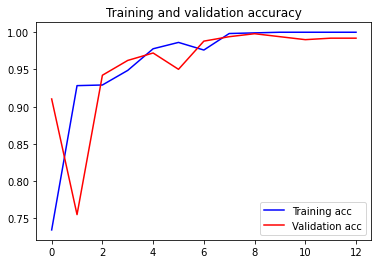

<Figure size 432x288 with 0 Axes>

In [25]:
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

In [26]:
# Loss Plot

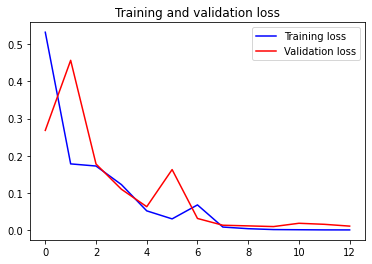

In [27]:
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [33]:
# Evaluate the Model

In [43]:
#Model Testing Function

def modelTesting(inputFile,modelName,Project):

    #width,height size
    size = 224

    #Image Preprocess

    img = cv2.imread(str(inputFile))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (size,size))

    test= np.array(img)/255.0
    test= test.reshape(-1, size,size, 3)

    # load and evaluate a saved model

    from keras.models import load_model
        
    # load model
    models = load_model(str(modelName))

    #Prediction

    predictions = models.predict(test)

    listOutputAcc = predictions.tolist()

    #Accuracy Score

    accuracy = max(listOutputAcc[0])*100

    listOutput = predictions.round().tolist()
    output=listOutput[0]

    out=[]
    if output==[1.0, 0.0]:
        out.append("Genuine")

    elif output==[0.0, 1.0]:
        out.append("Forged")

    verification=out[0]

    return [verification, accuracy]


In [44]:
# Example - Genunine

In [45]:
inputFile = "/content/drive/MyDrive/test/049/01_049.png"
modelName = "/content/signVerify_model.h5"

In [46]:
signatureVerfication = modelTesting(inputFile,modelName,project)

In [47]:
print(signatureVerfication)

['Genuine', 100.0]


In [48]:
# Example - Forged

In [49]:
inputFile = "/content/drive/MyDrive/test/049_forg/01_0114049.PNG"
modelName = "/content/signVerify_model.h5"

In [50]:
signatureVerfication = modelTesting(inputFile,modelName,project)

In [51]:
print(signatureVerfication)

['Forged', 100.0]
